# DATA COLLECTION & DATA PREPROCESSING

# LOADING DATASET

In [1]:
# IMPORTING LIBRARIES

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [4]:
# DEFINING THE CONSTANT

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [7]:
#IMPORTING THE DATASET

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PLANT VILLAGE",   
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
       )

Found 2152 files belonging to 3 classes.


In [8]:
#CHECKING ALL THE CLASS NAMES PRESENT IN THE DATASET

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
#CHECKING THE LENGTH

len(dataset)

68

ITS SHOWING 68 BCZ.. THE BATCH SIZE IS AROUND 32 AND THE MULTIPLIACTION BETWEEN 32 * 68 IS 2176...IT SHOWING BIT MORE FROM THE FILES FOUND BCZ LAST BATCH IS NOT PROPERLY SETTELED 

In [14]:
#NUMBER OF SIZE OF BATCHES IN IMAGE BATCH AND IN LABEL BATCH

for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 1 1 1 0 0 1 2 1 2 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0]


# DATA VISUALISATION

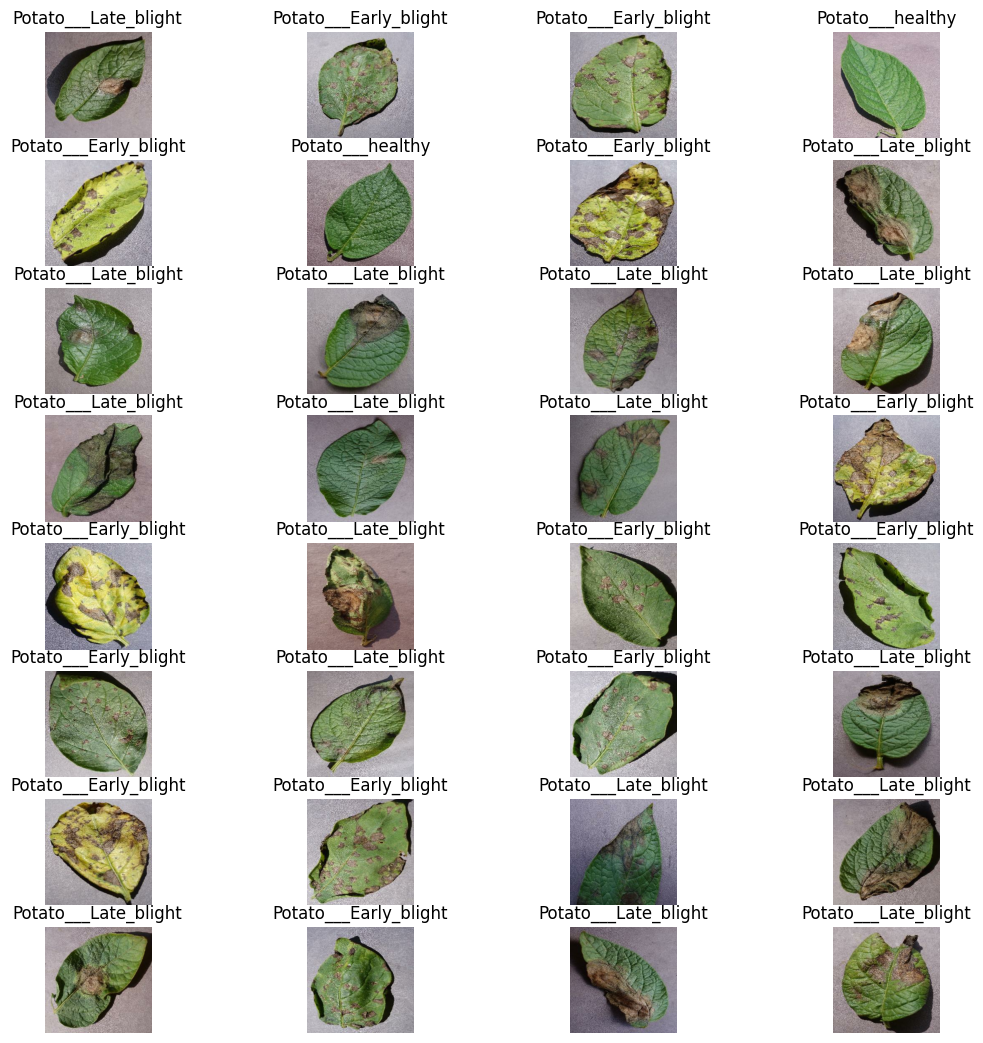

In [78]:
#CONVERING THE FLOAT TYPE INTO INTEGER TYPE FOR CLEAR VISUALISATION
#GETTING ALL THE CLASS NAMES WITH THE REAL IMAGE FIGURE


plt.figure(figsize=(13,13))

for image_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

ALL THE IMAGES IN THE SINGLE BATCH ARE SHOWING ABOVE...WITH THE SHUFFLE IS ON...SO THE BATCHES ARE SHUFFLING UP

# TRAIN TEST AND VALIDATION SPLIT

In [58]:
# TRAIN TEST SPLIT

def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, test_ds, val_ds

In [59]:
#PUTTING UP ALL THE VALUES ON THE DATASET

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [61]:
#GETTING ALL THE LENGTH OF THE TRAIN , TEST AND VALIDATION SPLIT

print("LENGTH OF THE TRAINING DATASET :",len(train_ds))
print("LENGTH OF THE TEST DATASET :",len(test_ds))
print("LENGTH OF THE VALIDATION DATASET :",len(val_ds))

LENGTH OF THE TRAINING DATASET : 54
LENGTH OF THE TEST DATASET : 6
LENGTH OF THE VALIDATION DATASET : 8


In [67]:
#PREFECTHING THE DATASET OF ALL TRAIN, TEST AND VALIADATION DATASET

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [68]:
#CREATING A SEQUENTIAL LAYER FOR RESIZING AND RESCALING

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [73]:
#CREATING A SEQUENTIAL LAYER FOR DATA AUGMENTATION


data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

LAYERS ARE IN CREATION FOR THE DEEP LEARNIG MODEL